In [37]:
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
plt.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False

#회귀분석ㅇ용인 보스턴 주택 가격을 분석
boston = load_boston()
print("데이터 형태 : {}".format(boston.data.shape))

X, y = mglearn.datasets.load_extended_boston()
print("X.shape:{}".format(X.shape))

데이터 형태 : (506, 13)
X.shape:(506, 104)


In [38]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(X_train,y_train)

print("훈련 세트 점수 : {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lr.score(X_test,y_test)))

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.61


In [39]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge.score(X_test,y_test)))

훈련 세트 점수 : 0.89
테스트 세트 점수 : 0.75


In [40]:
ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge10.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge10.score(X_test,y_test)))

훈련 세트 점수 : 0.79
테스트 세트 점수 : 0.64


In [41]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge01.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge01.score(X_test,y_test)))

훈련 세트 점수 : 0.93
테스트 세트 점수 : 0.77


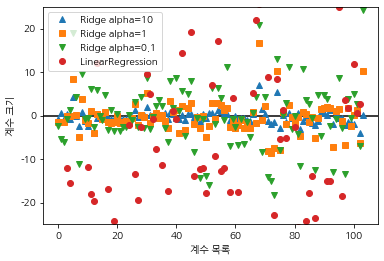

In [42]:
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')

plt.plot(lr.coef_,'o',label='LinearRegression')
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()

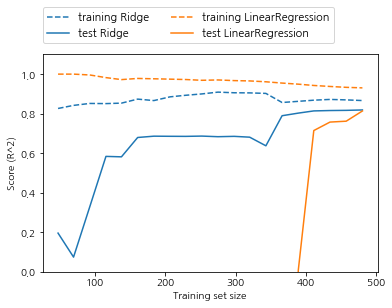

In [43]:
mglearn.plots.plot_ridge_n_samples()

In [44]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso.score(X_train,y_train)))
print("테스트 세트 점후 : {:.2f}".format(lasso.score(X_test,y_test)))
print("사용한 특성의 갯수 : ", np.sum(lasso.coef_ != 0))

훈련 세트 점수 : 0.29
테스트 세트 점후 : 0.21
사용한 특성의 갯수 :  4


In [45]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso001.score(X_test,y_test)))
print("사용한 특성의 갯수 : ", np.sum(lasso001.coef_ != 0))

훈련 세트 점수: 0.90
테스트 세트 점수 : 0.77
사용한 특성의 갯수 :  33


In [46]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso00001.score(X_test,y_test)))
print("사용한 특성의 갯수 : ", np.sum(lasso00001.coef_ != 0))

훈련 세트 점수: 0.95
테스트 세트 점수 : 0.64
사용한 특성의 갯수 :  96


Text(0, 0.5, '계수 크기')

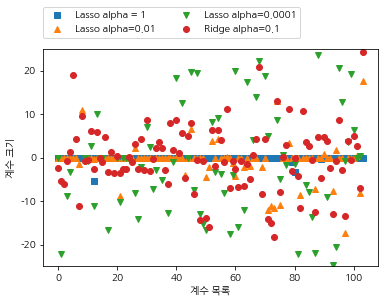

In [47]:
plt.plot(lasso.coef_,'s', label="Lasso alpha = 1")
plt.plot(lasso001.coef_,'^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_,'v',label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_,'o',label = "Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

ValueError: Unknown label type: 'continuous'